## EDA of Marvel Comic's Data Set

### import libraries and load data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from collections import defaultdict

In [3]:
df = pd.read_csv('../input/marvel-comics-character-dataset - marvel-wikia-data.csv')

In [4]:
df.head(10)

,id,name,identity,alignment,orientation,status,appearances,introduced,introduced_month,eyes,hair,gender
0,461528,Bardak,single,bad,straight,dead,1.0,1939.0,Dec.,NaN,brown,male
1,657451,Bends (Masked Raider),single,bad,straight,dead,1.0,1939.0,Oct.,NaN,NaN,male
2,437129,Blackie Ross,single,bad,straight,alive,1.0,1939.0,Dec.,NaN,black,male
3,642971,Bleck,single,neutral,straight,dead,1.0,1939.0,Oct.,NaN,NaN,male
4,437029,Cal Brunder,single,bad,straight,alive,1.0,1939.0,Oct.,NaN,NaN,male
5,437037,Constance Rand,single,good,straight,dead,1.0,1939.0,Oct.,NaN,blond,female
6,727089,Dead Shot (Masked Raider),NaN,bad,straight,alive,1.0,1939.0,Dec.,NaN,NaN,male
7,642926,Dr. Lang (The Big Boss),secret,bad,straight,alive,1.0,1939.0,Oct.,NaN,brown,male
8,642226,Dutch Hansen,single,bad,straight,dead,1.0,1939.0,Oct.,NaN,NaN,male
9,641961,Ganya,single,neutral,straight,alive,1.0,1939.0,Dec.,NaN,NaN,female


### Some Summary Data

In [9]:
df[df['name']=='Spinner']

,id,name,identity,alignment,orientation,status,appearances,introduced,introduced_month,eyes,hair,gender
9216,117498,Spinner,known to authorities,good,straight,alive,4.0,2008.0,Jun.,NaN,blond,female
16031,322600,Spinner,secret,good,straight,alive,NaN,2007.0,Nov.,NaN,NaN,male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 12 columns):
id                  16376 non-null int64
name                16376 non-null object
identity            12606 non-null object
alignment           13564 non-null object
orientation         16376 non-null object
status              16373 non-null object
appearances         15280 non-null float64
introduced          15561 non-null float64
introduced_month    15561 non-null object
eyes                6609 non-null object
hair                12112 non-null object
gender              15522 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 1.5+ MB


### Finding Null Values of the year Queer Marvel Comics were Introduced

In [5]:
df[(df['introduced'].isnull()) & (df['orientation'] !='straight')]

,id,name,identity,alignment,orientation,status,appearances,introduced,introduced_month,eyes,hair,gender
8293,667458,Ren Kimura,public,good,gay,alive,3.0,NaN,NaN,green,black,female
9378,733576,Ja Kyee Lrurt,single,good,gay,alive,4.0,NaN,NaN,green,black,female
10168,19642,Perry Webb,single,good,gay,alive,5.0,NaN,NaN,brown,black,male
16363,694577,Finch (Kate Bishop's neighbor),public,good,gay,alive,NaN,NaN,NaN,black,bald,male
16367,694583,Marcus (Kate Bishop's neighbor),public,good,gay,alive,NaN,NaN,NaN,hazel,bald,male


#### Trouble shooting null data points to find out if we can extrapolate data

In [6]:
find_lrurt = [ x for x in df['name'].values if 'Lrurt' in x ]
find_lrurt

['Ja Kyee Lrurt']

In [7]:
find_webb = [ x for x in df['name'].values if 'Webb' in x ]
find_webb

['Cornelius Webb',
 'Webber (Institute)',
 'Stella Webb',
 'Perry Webb',
 'Cassandra Webb']

In [8]:
df[df['name'].apply(lambda x: x in find_webb)]

,id,name,identity,alignment,orientation,status,appearances,introduced,introduced_month,eyes,hair,gender
1480,311938,Cornelius Webb,NaN,bad,straight,dead,1.0,1969.0,Dec.,NaN,NaN,male
3013,638331,Webber (Institute),public,bad,straight,alive,1.0,1994.0,Jun.,NaN,bald,male
6876,704480,Stella Webb,single,bad,straight,dead,2.0,NaN,NaN,blue,brown,female
10168,19642,Perry Webb,single,good,gay,alive,5.0,NaN,NaN,brown,black,male
14623,2069,Cassandra Webb,public,good,straight,dead,58.0,1980.0,Nov.,grey,black,female


In [9]:
find_kimura = [ x for x in df['name'].values if 'Kimura' in x ]

In [10]:
df[df['name'].apply(lambda x: x in find_kimura)]

,id,name,identity,alignment,orientation,status,appearances,introduced,introduced_month,eyes,hair,gender
5440,410060,Asano Kimura,NaN,good,straight,dead,2.0,1982.0,Sep.,brown,black,male
8293,667458,Ren Kimura,public,good,gay,alive,3.0,NaN,NaN,green,black,female
13333,41144,Kimura,public,NaN,straight,alive,18.0,2006.0,Dec.,green,black,female


#### Creating an assumption Kate Bishop's neighbors were introduced the same year as her

In [11]:
df[df['name']=='Katherine Bishop']

,id,name,identity,alignment,orientation,status,appearances,introduced,introduced_month,eyes,hair,gender
14940,6635,Katherine Bishop,public,good,straight,alive,122.0,2005.0,Apr.,blue,black,female


#### Googled Values for Introduction Dates of remaining null values

In [12]:
df.at[[16363, 16367], 'introduced'] = 2005

In [13]:
df.at[[8293], 'introduced'] = 2013

In [14]:
df.at[[10168], 'introduced'] = 1939

In [15]:
df.at[[9378], 'introduced'] = 2014

In [16]:
df.iloc[16363]['introduced'] 

2005.0

### Finding unique gender types

In [17]:
df['gender'].unique()

array(['male', 'female', nan, 'agender', 'genderfluid'], dtype=object)

In [18]:
df['orientation'].unique()

array(['straight', 'gay', 'trans', 'bi', 'genderfluid', 'pansexual'],
      dtype=object)

In [19]:
len(df[df['orientation'].isnull()])

0

In [20]:
queer = df[df['orientation'] != 'straight']
len(queer)

89

In [21]:
# Percentage of queer marvel characters

len(queer)/len(df) *100

0.5434782608695652

In [22]:
queer_females = df[(df['orientation'] != 'straight') & (df['gender'] == 'female')]
len(queer_females)

40

In [23]:
queer_nonbin = df[(df['orientation'] != 'straight') & (df['gender'] != 'female') & (df['gender'] != 'male')]
queer_nonbin

,id,name,identity,alignment,orientation,status,appearances,introduced,introduced_month,eyes,hair,gender
14156,23853,Xavin,secret,good,genderfluid,alive,33.0,2005.0,Oct.,brown,brown,genderfluid
15218,2042,Loki Laufeyson,single,neutral,bi,alive,532.0,1949.0,Aug.,green,black,genderfluid


In [24]:
nonbin = df[(df['gender'] != 'female') & (df['gender'] != 'male')]
len(nonbin)

901

#### there is actually a lot of missing gender data. 901 is a lot. To continue for next time!

### Functions that will be used repeatedly

In [267]:
# code to make stacked bars from dataframe
def plot_stacked_info(df_nums):
    ax = df_nums.plot(kind='bar', stacked=True, figsize=(18.5, 10.5))
    ax.set_ylabel('Number Of Queer Characters by Gender Introduced')
    ax.set_xlabel('Decade End')
    loc_x = ax.get_xticks()
    ave_bar = [p.get_width()/5 for p in ax.patches]
    for loc, i in zip(loc_x,range(len(df_nums))):
        plt.text(x = loc - ave_bar[0], y = sum(df_nums.iloc[i].values)+0.1, s = str(round(sum(df_nums.iloc[i].values)/16376*100, 2))\
                 , size = 10)
        
    plt.title("Marvel Comics Characters by Decade")

    plt.savefig('Marvel'+str(len(df_nums))+'.png')
    plt.show()

In [203]:
# this function is for binning for the stacked bar graph
def inRanges(data,maxValues):
    """Sorts elements of data into bins that have a max-value. Max-values are
    given by the list maxValues which holds the explusive upper bound of the bins."""
    d = {k:[] for k in maxValues} # init all keys to empty lists
    for n in data:
        n = float(n)
        try:
            key = min([x for x in maxValues if x > n]) # get key
            d[key].append(n) # add number
        except:
            print(n)
    return d

dict_items([(1940, [1939.0]), (1950, [1940.0, 1943.0, 1948.0, 1949.0]), (1960, []), (1970, [1960.0, 1964.0, 1965.0]), (1980, [1972.0, 1973.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0]), (1990, [1980.0, 1981.0, 1982.0, 1984.0, 1987.0, 1988.0, 1989.0]), (2000, [1990.0, 1991.0, 1992.0, 1994.0, 1995.0, 1997.0, 1998.0]), (2010, [2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0]), (2020, [2010.0, 2011.0, 2012.0, 2013.0, 2014.0])])

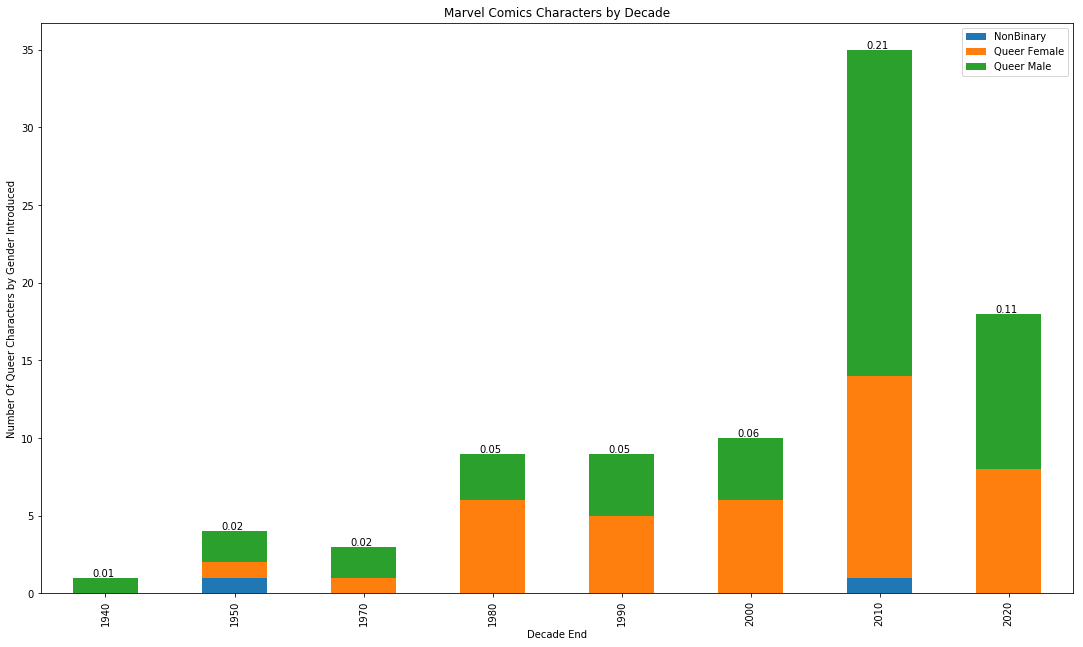

In [268]:
plot_stacked_info(df_dec)

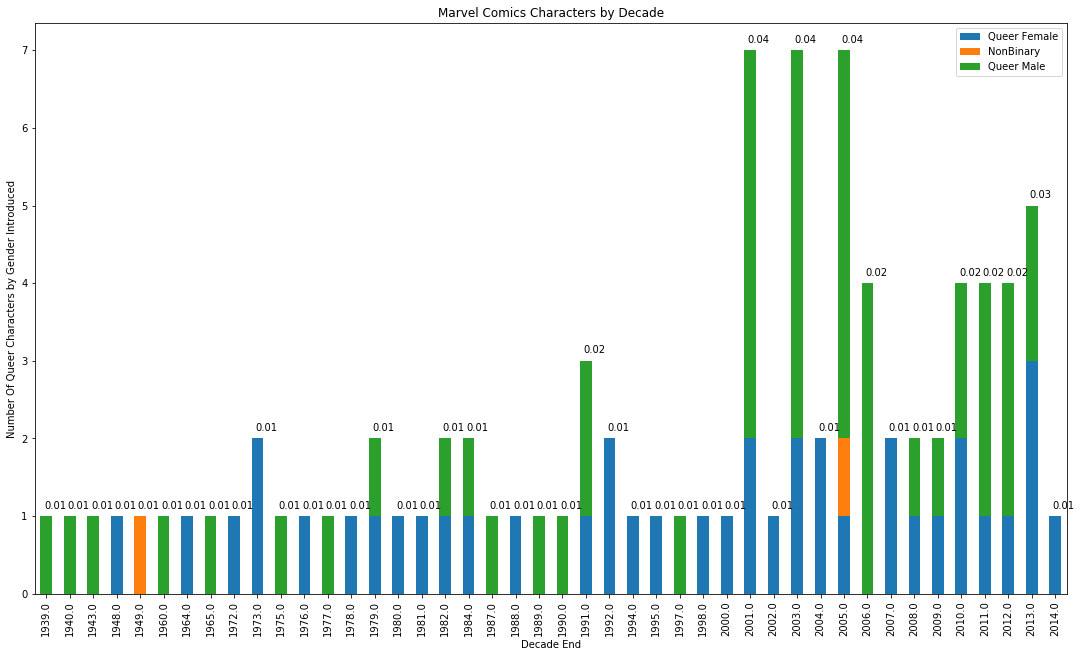

In [269]:
plot_stacked_info(df_numes)

In [27]:
# code to make masks
def make_mask_of_data (df, column, criteria, not_=False):
    if not_ == True:
        mask = df[column] != criteria
       
    else:
        mask = df[column] == criteria
        
    return mask

In [28]:
# code to make x and y data points for graphing from counts of columns
def def_x_and_y(df_, column):
    x = df_[column].unique()
    y = df_.groupby([column])[column].count()
    y['nan'] = df_[df_[column].isnull()]['id'].count()
    
    return(x,y)

#### MASKS FOR DATA

In [29]:
# queermask
queer_mask = make_mask_of_data(df, 'orientation', 'straight', not_=True)

In [30]:
# malemask
_male = make_mask_of_data(df, 'gender', 'male')

In [73]:
# queer and male
queer_male_sample = df[queer_mask & _male]

In [85]:
# queer and male stack
xq_male, yq_male = def_x_and_y(queer_male_sample, 'introduced')

In [86]:
# non binary and queer
nonbin_sample = df[queer_mask & (df['gender'] != 'male') & (df['gender'] != 'female')]
xnb, ynb = def_x_and_y(nonbin_sample, 'introduced')

In [87]:
# femalemask
_female = make_mask_of_data(df, 'gender', 'female')

In [88]:
# df of queer female masks
queer_female_sample = df[queer_mask & _female]


In [89]:
# creating x and y values 
xq_female, yq_female = def_x_and_y(queer_female_sample, 'introduced')

In [70]:
# making dummy variables of all the data points
lengths_= [(xq_female, yq_female),(xnb, ynb), (xq_male, yq_male) ]
x_values = []
for x in lengths_:
    for val in x[0]:
        if val not in x_values:
            try: 
                x_values.append(float(val))
            except:
                print(val, x)
            
x_values =sorted(x_values, key = lambda x: float(x))

In [90]:
# female dummy variables (x values)
for x in x_values:
    if x not in pd.Series(yq_female).index:
        s3 = pd.Series([0], index=[x])
        yq_female = yq_female.append(s3)


In [92]:
# non-binary dummy variables
ynb
for x in x_values:
    if x not in ynb.index:
        s3 = pd.Series([0], index=[x])
        ynb = ynb.append(s3)


In [93]:
# male queer dummy variables
yq_male
for x in x_values:
    if x not in yq_male.index:
        s3 = pd.Series([0], index=[x])
        yq_male = yq_male.append(s3) 

In [94]:
# solidifying the dataframe with focused data created
df_numes = pd.DataFrame([yq_female, ynb, yq_male], index = ['Queer Female', 'NonBinary', 'Queer Male']).T

In [95]:
df_numes

,Queer Female,NonBinary,Queer Male
1948.0,1,0,0
1964.0,1,0,0
1972.0,1,0,0
1973.0,2,0,0
1976.0,1,0,0
1978.0,1,0,0
1979.0,1,0,1
1980.0,1,0,0
1981.0,1,0,0
1982.0,1,0,1


In [ ]:
df_numes.drop(['nan'], axis=0, inplace=True)
df_numes

In [ ]:
df_numes.sort_index(inplace=True)

In [ ]:
# creating bins for data and sorting values according to bins
columns_dec = list(range(1940, 2030, 10))
sort_ =  inRanges(df_numes.index, columns_dec)


In [ ]:
# fancy dictionary of bins made in previous cell
def make_bins_dict(bins_range, sort_dict, df_):
    dec_df = defaultdict(dict)

    for key, value in sort_dict.items():
        for col in df_.columns:
            sum_key = 0
            for val in value:
                sum_key += df_.loc[val][col]
            dec_df[key].update({col: sum_key})

df_dec = make_bins_dict(columns_dec, sort_, df_numes)

In [ ]:
# transposed df to prep for plotting
df_dec = pd.DataFrame(dec_df).T
df_dec

In [ ]:
# plot of queer characters by decade
plot_stacked_info(df_dec)

In [ ]:
# plot of queer characters by year
plot_stacked_info(df_numes)